In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import special as sp
import scipy.integrate as integrate

C:\Users\zecco\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\zecco\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in double_scalars
C:\Users\zecco\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


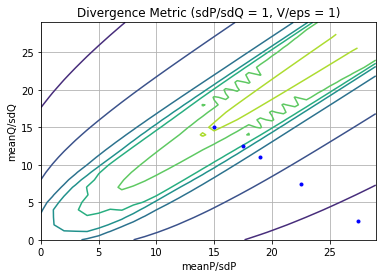

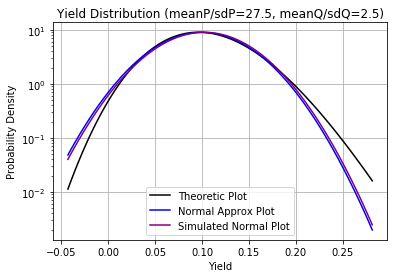

0.006610059455583651


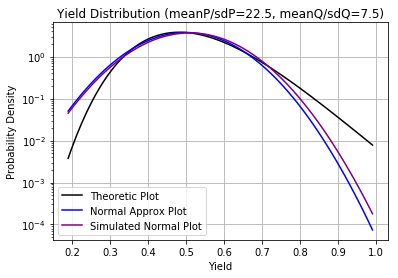

0.026042886631433358


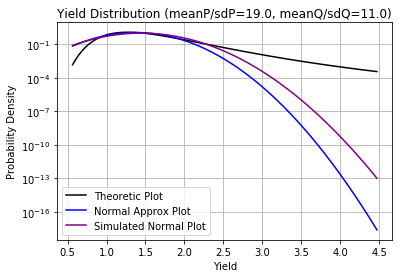

0.13708307456298338


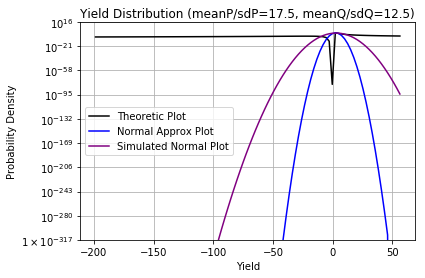

3.6478891467411554


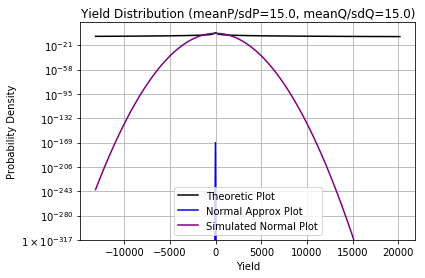

114.54154437496194


'\nf2 = theta_dist(bin_edges2[0:-1], (meanP/sdP), (meanQ/sdQ), r, k)\nhist2, bin_edges2 = np.histogram(Thetadata, bins, density=density)\n\nplt.figure()\nplt.plot(bin_edges2[0:-1], (hist2), drawstyle = "steps-mid", color="red", label = "Simulated Data")\nplt.plot(bin_edges2[0:-1], f2, color="black", label = "Theoretic Plot")\nplt.grid()\nplt.xlabel("Theta")\nplt.ylabel("Probability Density")\nplt.title("Theta Distribution")\nplt.legend()\nplt.show()\n'

In [5]:
def ratio_dist(z, res_p, res_q, r1, k1):
    F1 = np.exp(-0.5*(res_q**2 + res_p**2)) / (np.pi*(r1*z**2 + (1/r1)*(1+k1*z)*2))
    
    G11 = (r1*(z*res_q*r1 + (1+k1*z)*res_p)) / (np.sqrt(2*np.pi)*np.power(z**2 * r1**2 + (1+k1*z)**2, 3/2))
    G12 = np.exp(-(z*res_p*r1 - (1+k1*z)*res_q)**2 / (2*(z**2 * r1**2 + (1+k1*z)**2)))
    G13 = sp.erf((z*res_q + (1+k1*z)*res_p/r1) / np.sqrt(2*(z**2 + (1+k1*z)**2 / r1**2)))

    return F1 + G11*G12*G13

def theta_dist(theta, res_p, res_q, r1, k1):
    alph = (res_q**2 + res_p**2)
    phi = np.arctan((r1*res_p-k1*res_q)/((r1*res_q+k1*res_p)))
    F1 = (np.exp(-0.5*alph) / np.pi)
    
    G11 = np.sqrt(alph/(2*math.pi))*np.sin(theta+phi)
    G12 = np.exp(((np.sin(theta+phi)**2)-1)*alph/2)
    G13 = sp.erf(np.sqrt(alph/2)*np.sin(theta+phi))

    return F1 + G11*G12*G13

def norm_dist(x,mu,sigma):
    return np.exp(-(((x-mu)/sigma)**2)/2)/np.sqrt(2*np.pi*sigma**2)

def theta_MTI(theta, n, res_p, res_q, r1, k1):
    alph = (res_q**2 + res_p**2)
    phi = np.arctan((r1*res_p-k1*res_q)/((r1*res_q+k1*res_p)))
    F1 = (np.exp(-0.5*alph) / np.pi)
    
    G11 = np.sqrt(alph/(2*math.pi))*np.sin(theta+phi)
    G12 = np.exp(((np.sin(theta+phi)**2)-1)*alph/2)
    G13 = sp.erf(np.sqrt(alph/2)*np.sin(theta+phi))

    return (F1 + G11*G12*G13)*np.power(theta,n)

def DivergenceMetricIntegrand(x, mu, sigma, res_p, res_q, r1, k1):
    return norm_dist(x,mu,sigma)*np.log(norm_dist(x,mu,sigma)/ratio_dist(x,res_p,res_q,r1,k1))

def DivergenceMetric(mu, sigma, res_p, res_q, r1, k1):
    bound = integrate.quad(DivergenceMetricIntegrand,mu-10*sigma,mu+10*sigma,args=(mu, sigma, res_p, res_q, r1, k1))[0]
    return bound
    
def H(x,r1,k1):
    return ((r1*np.tan(x)-k1)/(r1**2+k1**2))

def Hp(x,r1,k1):
    return r1/((r1**2+k1**2)*(np.cos(x)**2))

def invH(x,r1,k1):
    return np.arctan(((r1**2+k1**2)*Zdata+k1)/r1)


#Normal Approx
def meanZ(res_p,res_q,r1,k1):
    meanTheta = integrate.quad(theta_MTI, -math.pi/2, math.pi/2, args = (1,res_p,res_q,r1,k1))[0]
    return H(meanTheta,r1,k1)
def sdZ(res_p,res_q,r1,k1):
    meanTheta = integrate.quad(theta_MTI, -math.pi/2, math.pi/2, args = (1,res_p,res_q,r1,k1))[0]
    m2Theta = integrate.quad(theta_MTI, -math.pi/2, math.pi/2, args = (2,res_p,res_q,r1,k1))[0]
    varTheta = m2Theta-meanTheta**2
    sdTheta = np.sqrt(varTheta)
    return Hp(meanTheta,r,k)*sdTheta

def YieldPlot(meanP,sdP,meanQ,sdQ,k):
    N = 10000
    r = sdP/sdQ
    
    #Data Generation
    np.random.seed(14)
    Pdata = np.random.normal(meanP,sdP,N)
    Qdata = np.random.normal(meanQ,sdQ,N)
    Zdata = (Qdata) / (Pdata-k*Qdata)
    
    simMeanZ = sum(Zdata)/N
    simSdZ = np.sqrt(sum((Zdata-simMeanZ)**2)/(N-1))
    
    #Histogram
    density = True
    bins = 100
    hist, bin_edges = np.histogram(Zdata, bins, density=density)

    #Theoretical Plot
    f = ratio_dist(bin_edges[0:-1], (meanP/sdP), (meanQ/sdQ), r, k)
    fN = norm_dist(bin_edges[0:-1],meanZ((meanP/sdP), (meanQ/sdQ), r, k),sdZ((meanP/sdP), (meanQ/sdQ), r, k))
    fSN = norm_dist(bin_edges[0:-1],simMeanZ,simSdZ)

    plt.figure()
    #plt.plot(bin_edges[0:-1], (hist), drawstyle = "steps-mid", color="red", label = "Simulated Data")
    plt.plot(bin_edges[0:-1], f, color="black", label = "Theoretic Plot")
    plt.plot(bin_edges[0:-1], fN, color="blue", label = "Normal Approx Plot")
    plt.plot(bin_edges[0:-1], fSN, color="purple", label = "Simulated Normal Plot")
    plt.grid()
    plt.xlabel("Yield")
    plt.ylabel("Probability Density")
    plt.title("Yield Distribution (meanP/sdP=" + str(meanP/sdP) + ", meanQ/sdQ=" + str(meanQ/sdQ) + ")")
    plt.yscale("log")
    plt.legend()
    plt.show()
    print(DivergenceMetric(meanZ((meanP/sdP), (meanQ/sdQ), r, k),sdZ((meanP/sdP), (meanQ/sdQ), r, k),(meanP/sdP), (meanQ/sdQ), r, k))


r = 1
k = 1
p = np.arange(0, 30, 1)
q = np.arange(0, 30, 1)
pp, qq = np.meshgrid(p, q, sparse=True)


z = [[0 for x in range(len(q))] for y in range(len(p))]

for q_i in range(len(q)):
    for p_i in range(len(p)):
        z[q_i][p_i] = np.log(DivergenceMetric(meanZ(p[p_i],q[q_i],r,k),sdZ(p[p_i],q[q_i],r,k),p[p_i],q[q_i],r,k))
        #print(z[q_i][p_i])

XEvalPts = [27.5,22.5,19,17.5,15]
YEvalPts = [2.5,7.5,11,12.5,15]

plt.figure()
plt.grid()
plt.contour(p,q,z)
plt.plot(XEvalPts,YEvalPts,'b.')
plt.title("Divergence Metric (sdP/sdQ = " + str(r) + ", V/eps = " + str(k) + ")")
plt.xlabel("meanP/sdP")
plt.ylabel("meanQ/sdQ")
plt.show()


for indexi, evalPt in enumerate(XEvalPts):    
    YieldPlot(r*XEvalPts[indexi],r,YEvalPts[indexi],1,k)


"""
f2 = theta_dist(bin_edges2[0:-1], (meanP/sdP), (meanQ/sdQ), r, k)
hist2, bin_edges2 = np.histogram(Thetadata, bins, density=density)

plt.figure()
plt.plot(bin_edges2[0:-1], (hist2), drawstyle = "steps-mid", color="red", label = "Simulated Data")
plt.plot(bin_edges2[0:-1], f2, color="black", label = "Theoretic Plot")
plt.grid()
plt.xlabel("Theta")
plt.ylabel("Probability Density")
plt.title("Theta Distribution")
plt.legend()
plt.show()
"""